In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib.pyplot import figure, show

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset

In [70]:
df = pd.read_csv('/content/drive/MyDrive/project/Bangla-Fake-News-Detection-master/Dataset/LabeledAuthentic-7K.csv', engine='python', encoding='utf-8')
df.shape

(7202, 9)

In [71]:
df1= pd.read_csv('/content/drive/MyDrive/project/Bangla-Fake-News-Detection-master/Dataset/LabeledFake-1K.csv', engine='python', encoding='utf-8')
df1.shape

(1299, 10)

In [72]:
df2= pd.read_csv('/content/drive/MyDrive/project/Bangla-Fake-News-Detection-master/Dataset/Authentic-48K.csv', engine='python', encoding='utf-8')
df2.shape

(48678, 7)

In [73]:
df3= pd.read_csv('/content/drive/MyDrive/project/Bangla-Fake-News-Detection-master/Dataset/Fake-1K.csv', engine='python', encoding='utf-8')
df3.shape

(1299, 7)

Merging All DataFrame

In [74]:
#merging df & df1
merge = [df,df1,df2,df3]
merged = pd.concat(merge)
merged.shape

(58478, 10)

In [75]:
#shuffle
merged = merged.sample(frac=1).reset_index(drop=True)

In [76]:
merged.columns

Index(['articleID', 'domain', 'date', 'category', 'source', 'relation',
       'headline', 'content', 'label', 'F-type'],
      dtype='object')

Columns

- articleID : ID of the news
- domain : News publisher's site name
- date : Published Date
- category : Category of the news
- source	: Source of the news. (One who can verify the claim of the news)
- relation :	Related or Unrelated. Related if headline matches with content's claim otherwise it is labeled as Unrelated
- headline	: Headline of the news
- content	: Article or body of the news
- label :	1 or 0 . '1' for authentic '0' for fake
- F-type :	Type of fake news (Clickbait, Satire, Fake(Misleading or False Context))

In [77]:
merged.head()

,articleID,domain,date,category,source,relation,headline,content,label,F-type
0,36695,jagonews24.com,2018-10-02 18:47:13,Sports,NaN,NaN,আরিফুলের দ্বিশতকে রানপাহাড়ে রংপুর,প্রথম দিনেই সেঞ্চুরি তুলে নিয়েছিলেন ডানহাতি পে...,1.0,NaN
1,3116,rtnn.net,2018-09-22 22:52:29,Politics,NaN,NaN,খালেদার অনুপস্থিতিতেই জিয়া চ্যারিটেবল মামলার ব...,নিজস্ব প্রতিবেদক আরটিএনএন ঢাকা: বহুল আলোচিত জ...,1.0,NaN
2,17667,prothomalo.com,2018-09-25 23:01:14,National,NaN,NaN,নির্বাচনে সৎ ও যোগ্যদের গুরুত্ব দিন,"রাষ্ট্রপতি মো. আবদুল হামিদ বলেছেন, ‘নির্বাচন খ...",1.0,NaN
3,41664,ittefaq.com.bd,2018-10-04 14:11:21,National,NaN,NaN,টেকনাফে নাফনদী থেকে দুই মৃতদেহ উদ্ধার,কক্সবাজারের টেকনাফ থানার পুলিশ নাফনদী থেকে ভাস...,1.0,NaN
4,44088,jagonews24.com,2018-10-05 12:11:28,Education,NaN,NaN,এমবিবিএস ভর্তি পরীক্ষা শুরু,স্বাস্থ্য অধিদফতরের অধীনে রাজধানীসহ সারাদেশে স...,1.0,NaN


In [79]:
# details of the dataset
# This dataset is huge, so we will use "memory_usage" in df.info

def fast_intro(df):
    print("------Summary-----\n")
    print(df.info(memory_usage = "deep"))
    print("\n------Descriptive and Quartile Statistics------\n")
    print(df.describe())
    print("\n------1st 10 rows------\n")
    print(df.head(10))
    print("\n------last 10 rows------\n")
    print(df.tail(10))
    print("\n------Random 10 rows------\n")
    print(df.sample(10))

fast_intro(merged)

------Summary-----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58478 entries, 0 to 58477
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   articleID  58478 non-null  int64  
 1   domain     58478 non-null  object 
 2   date       58478 non-null  object 
 3   category   58478 non-null  object 
 4   source     8501 non-null   object 
 5   relation   8501 non-null   object 
 6   headline   58478 non-null  object 
 7   content    58478 non-null  object 
 8   label      58478 non-null  float64
 9   F-type     1299 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 508.0 MB
None

------Descriptive and Quartile Statistics------

          articleID         label
count  58478.000000  58478.000000
mean   26178.306868      0.900202
std    19379.622643      0.299733
min        1.000000      0.000000
25%     7094.000000      1.000000
50%    24555.500000      1.000000
75%    43085.750000      1.000000
m

Handling Null Value

In [80]:
merged.isnull().sum()

,0
articleID,0
domain,0
date,0
category,0
source,49977
relation,49977
headline,0
content,0
label,0
F-type,57179


In [81]:
merged.drop(['source'], axis=1, inplace=True)
merged.drop(['relation'], axis=1, inplace=True)
merged.drop(['F-type'], axis=1, inplace=True)

In [82]:
# remove articleID
merged.drop(['articleID'], axis=1, inplace=True)

# Dataset Cleaning

In [83]:
merged['domain'] = merged['domain'].astype(str)
merged['category'] = merged['category'].astype(str)
merged['label'] = merged['label'].astype(int)

In [84]:
merged.sample(10)

,domain,date,category,headline,content,label
35369,jagonews24.com,2018-09-22 11:12:27,National,পাহাড়ের রাজনীতি নিয়ে যত কথা,পাহাড়ের রাজনীতিতে দিন দিন যেমন ঘটছে পরিবর্তন ঠ...,1
31530,somoynews.tv,2018-09-28 14:47:50,National,বর্ডার গার্ডের ৯২তম রিক্রুট ব্যাচের কুচকাওয়াজ,বর্ডার গার্ড বাংলাদেশের ৯২তম রিক্রুট ব্যাচের স...,1
47858,ittefaq.com.bd,2018-09-28 15:25:27,International,রানওয়ে থেকে প্রশান্ত মহাসাগরীয় হৃদে বিমান,মাইক্রোনেশিয়ার প্রত্যন্ত দ্বীপাঞ্চলে একটি যাত্...,1
48703,risingbd.com,2018-10-03 16:27:19,Entertainment,জায়েদ-মৌয়ের রোমান্সের মধ্য দিয়ে ক্যামেরা ক্লোজ,বিনোদন প্রতিবেদক : চিত্রনায়ক জায়েদ খান ও নবাগত...,1
14607,kalerkantho.com,2018-10-06 20:01:15,Sports,মাশরাফির মতো সাকিবও কিন্তু ফাইটার : আকরাম,চোটের বিরুদ্ধে মাশরাফি বিন মুর্তজার লড়াইয়ের গল...,1
2810,jagonews24.com,2018-09-21 14:48:28,International,বাংলাদেশ এখনো সন্ত্রাসী হামলার ঝুঁকিতে রয়েছে :...,মার্কিন পররাষ্ট্র মন্ত্রণালয়ের সন্ত্রাসবাদ সম্...,1
15128,risingbd.com,2018-09-21 14:16:14,National,তাজিয়া মিছিলে ‘হায় হোসেন’ধ্বনি,নিজস্ব প্রতিবেদক : পবিত্র আশুরায় তাজিয়া মিছিল ...,1
17076,prothomalo.com,2018-10-03 21:12:41,Sports,বঙ্গবন্ধু কাপের সেমি নিশ্চিত বাংলাদেশের,আজ বঙ্গবন্ধু গোল্ডকাপে নিজেদের প্রথম ম্যাচে লা...,1
42552,independent24.com,2018-09-21 15:03:01,National,ঘূর্ণিঝড় দেয়ির প্রভাবে ঝড়ো হাওয়ার সম্ভাবনা,ঘূর্ণিঝড় দেয়ির প্রভাবে বাংলাদেশের উপকূলীয় এলাক...,1
39308,dailyjanakantha.com,2018-10-02 19:23:58,National,বকেয়া বেতন-ভাতার দাবিতে জনকণ্ঠের প্রথম দিনের ক...,জনকন্ঠ রিপোর্টার ॥ দুই বছরের বেশি সময়ের বকেয়া ...,1


Handling Date

In [85]:
#merged['date']= merged['date'].apply(lambda x: x[:4] + '-' + x[5:7] + '-'+ x[8:10])
import re
allcount = 0
negCount = 0
indexList = []
print(merged.iloc[0]['date'])
for i in range(len(merged)):
  if not re.match(r'(\d{2,4}-\d{2}-\d{2,4})+',merged.iloc[i]['date']):
    #print(merged.iloc[i]['date'])
    allcount += 1
    if merged.iloc[i]['label'] is 0:
      negCount += 1
    indexList.append(i)
print(allcount)
print(negCount)

2018-10-02 18:47:13
568
0


In [86]:
merged = merged.drop(indexList)

In [87]:
merged['date']= merged['date'].apply(lambda x: x[:4] + '-' + x[5:7] + '-'+ x[8:10])
merged['date'] = pd.to_datetime(merged['date'], dayfirst=True)

ValueError: unconverted data remains when parsing with format "%Y-%d-%m": "2", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [89]:
import re
import pandas as pd

# ... (Your existing code) ...

def clean_date(date_str):
  """
  This function attempts to clean and standardize date strings.
  It handles common date formats found in the dataset.
  """
  try:
    # Handle dates in YYYY-MM-DD format
    if re.match(r'\d{4}-\d{2}-\d{2}', date_str):
      return date_str
    # Handle dates in DD-MM-YYYY format
    elif re.match(r'\d{2}-\d{2}-\d{4}', date_str):
      return pd.to_datetime(date_str, format='%d-%m-%Y').strftime('%Y-%m-%d')
    # Handle dates in other formats (e.g., with times)
    else:
      # Extract date portion using regular expression
      match = re.search(r'(\d{2,4}-\d{2}-\d{2,4})', date_str)
      if match:
        return match.group(1)
      else:
        return None  # Or raise an exception if needed

  except ValueError:
    return None  # Or raise an exception if needed


merged['date'] = merged['date'].apply(clean_date)
merged = merged.dropna(subset=['date'])  # Remove rows with invalid dates

merged['date'] = pd.to_datetime(merged['date'], format='%Y-%m-%d', errors='raise')

# ... (Rest of your code) ...

In [90]:
merged = merged.sort_values(by = ['date'],ascending=False)


In [91]:
merged.head(5)

,domain,date,category,headline,content,label
12495,daily-bangladesh.com,2019-11-17,National,পেঁয়া‌জের কে‌জি যেভা‌বে ২০০ থে‌কে ক‌মে ৪০ টাকা...,কুষ্টিয়ার পৌর কাঁচাবাজারে হঠাৎ করেই কেজিতে ৪০ ...,0
18881,daily-bangladesh.com,2019-11-17,National,পেঁয়া‌জের কে‌জি যেভা‌বে ২০০ থে‌কে ক‌মে ৪০ টাকা...,কুষ্টিয়ার পৌর কাঁচাবাজারে হঠাৎ করেই কেজিতে ৪০ ...,0
4156,dhakajournals.com,2019-10-15,International,"গাঁজা সেবনে চাকরি দেবে নাসা, বেতন ১৪ লাখ!","মাদকের বিরুদ্ধে বিশ্ব যখন একাট্টা, তখন গাঁজা স...",0
35756,dhakajournals.com,2019-10-15,International,"গাঁজা সেবনে চাকরি দেবে নাসা, বেতন ১৪ লাখ!","মাদকের বিরুদ্ধে বিশ্ব যখন একাট্টা, তখন গাঁজা স...",0
50652,sharenews24.com,2019-10-13,National,সাড়ে চার কোটি টাকা ফেরত দিলেন ছাত্রলীগ নেতা,"ছাত্রলীগ নেতাদের নীতি-নৈতিকতা, মানবিকতা, দেশপ্...",0


Unique content handling

In [92]:
print("Unique Content :",len(list(set(merged['content']))))
print("Total rows :",len(merged))

Unique Content : 52617
Total rows : 57910


In [93]:
# dropping ALL duplicte values
merged.drop_duplicates(subset ="content",
                     keep = "first", inplace = True)

In [94]:
merged

,domain,date,category,headline,content,label
12495,daily-bangladesh.com,2019-11-17,National,পেঁয়া‌জের কে‌জি যেভা‌বে ২০০ থে‌কে ক‌মে ৪০ টাকা...,কুষ্টিয়ার পৌর কাঁচাবাজারে হঠাৎ করেই কেজিতে ৪০ ...,0
4156,dhakajournals.com,2019-10-15,International,"গাঁজা সেবনে চাকরি দেবে নাসা, বেতন ১৪ লাখ!","মাদকের বিরুদ্ধে বিশ্ব যখন একাট্টা, তখন গাঁজা স...",0
50652,sharenews24.com,2019-10-13,National,সাড়ে চার কোটি টাকা ফেরত দিলেন ছাত্রলীগ নেতা,"ছাত্রলীগ নেতাদের নীতি-নৈতিকতা, মানবিকতা, দেশপ্...",0
11389,bangla.dhakatribune.com,2019-10-12,National,কাজ শেষে সরকারকে সাড়ে ৪ কোটি টাকা ফেরত দিলেন ঠ...,চট্টগ্রাম মহানগরীতে বরাদ্দকৃত অর্থের চেয়ে কম ট...,0
10695,ourevergreenbangladesh.com,2019-10-12,National,কাজের অতিরিক্ত সাড়ে ৪ কোটি টাকা ফেরত দিলেন ছাত...,এই মুহূর্তে দেশের হাজার হাজার মানুষের ওয়ালে লে...,0
...,...,...,...,...,...,...
53468,motikontho.wordpress.com,2011-04-25,National,চট্টগ্রাম মেডিকেলের শিক্ষার্থীদের আবার সড়ক অবর...,"নিজস্ব মতিবেদক, চট্টগ্রাম | তারিখ: ২৫-০৪-২০১১চ...",0
55878,motikontho.wordpress.com,2011-03-31,Miscellaneous,চট্টগ্রামের নেতাদের নাপাক বললেন মোদাচ্ছের | দৈ...,চট্টগ্রাম মতিনিধিপুটু মারামারি বাদ দিয়ে চট্টগ...,0
8668,motikontho.wordpress.com,2011-03-31,Sports,ভারতের নাগরিকত্ব দাবি করলেন আফ্রিদি,কূটনৈতিক মতিবেদকগতকাল ভারতের মহালিতে অনুষ্ঠিত ...,0
4500,motikontho.wordpress.com,2011-03-31,Sports,কাঁদালেন আফ্রিদি | দৈনিক মতিকণ্ঠ,"উটপোঁদ শুভ্র, হারেক মাহমুদ ও পাকিতারিফুল ইসলাম...",0


Data Analysis

In [95]:
merged['domain'].value_counts()

,count
domain,
jagonews24.com,4932
kalerkantho.com,4642
banglanews24.com,4400
banglatribune.com,4137
jugantor.com,2838
...,...
agooannews.com,1
timesbangla.in,1
bdexclusivenews.blogspot.com,1


In [96]:
merged['category'].value_counts()

,count
category,
National,20538
International,7308
Sports,6825
Editorial,3544
Politics,3159
Miscellaneous,2816
Entertainment,2808
Finance,1270
Crime,1233


In [97]:
# category list for fake data
temp = merged[merged['label']==0]
temp['category'].value_counts()

,count
category,
National,1056
Miscellaneous,611
International,414
Sports,385
Entertainment,219
Politics,200
Editorial,167
Lifestyle,131
Education,75


In [98]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
merged['domain']= le.fit_transform(merged['domain'])
merged['category'] = le.fit_transform(merged['category'])

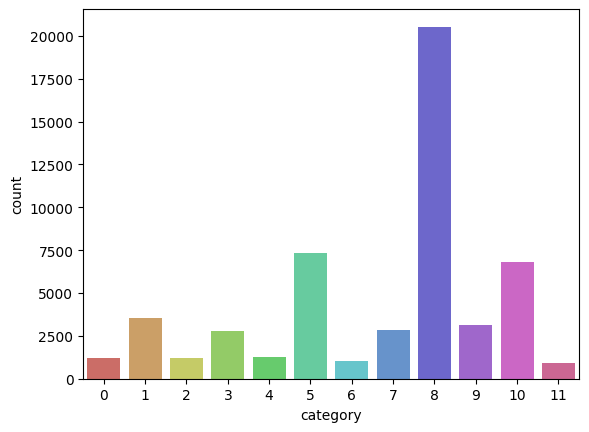

In [99]:
figure()
sb.countplot(x='category', data=merged, palette='hls')
show()

Stemmer

In [100]:
!git clone https://github.com/banglakit/bengali-stemmer.git

Cloning into 'bengali-stemmer'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 98 (delta 3), reused 2 (delta 2), pack-reused 94 (from 1)
Receiving objects: 100% (98/98), 25.10 KiB | 2.51 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [101]:
cd "/content/bengali-stemmer"


/content/bengali-stemmer


In [102]:
from bengali_stemmer.rafikamal2014 import RafiStemmer
stemmer = RafiStemmer()
stemmer.stem_word('কেজিতে')

'কেজি'

Stopwords

In [103]:
!pip install stopwordsiso
import stopwordsiso as stopwords

In [104]:
stop_words = stopwords.has_lang("th")
stop_words = stopwords.stopwords("bn")
print(stop_words)
print(len(stop_words))

{'দেওয়া', 'নেওয়া', 'এখানে', 'হয়েছিল', 'বসে', 'বলল', 'সেই', 'তেমন', 'এই', 'জন্যওজে', 'প্রায়', 'হৈলে', 'বিনা', 'পর', 'প্রতি', 'মধ্যে', 'কাছ', 'পারে', 'তাহা', 'ব্যাপারে', 'নয়', 'নিজের', 'থাকেন', 'তবু', 'জনকে', 'সুতরাং', 'করছেন', 'এবং', 'পক্ষে', 'খুব', 'তুলে', 'অন্তত', 'সেখান', 'চান', 'সহিত', 'যাকে', 'কি', 'সঙ্গেও', 'আগামী', 'তবে', 'করলে', 'করিয়া', 'এটাই', 'নানা', 'হত', 'এস', 'যথেষ্ট', 'পরেও', 'হতে', 'করবে', 'আর', 'এমনকী', 'একটি', 'হয়নি', 'যত', 'চেয়ে', 'হলো', 'জানায়', 'পর্যন্ত', 'ছিল', 'বদলে', 'বিশেষ', 'তারৈ', 'কবে', 'অথচ', 'হলে', 'প্রাথমিক', 'আগে', 'তুমি', 'যাওয়ার', 'হয়ে', 'চলে', 'নিতে', 'যিনি', 'কখনও', 'আমরা', 'এর', 'তাহলে', 'এখানেই', 'কয়েক', 'তাহাতে', 'একই', 'নতুন', 'নাকি', 'ও', 'ক্ষেত্রে', 'কোটি', 'আদ্যভাগে', 'দু', 'হবে', 'নিজেই', 'থাকায়', 'মাধ্যমে', 'যাদের', 'সেটা', 'মোটেই', 'কেউ', 'এ', 'যাতে', 'নিজেদের', 'করবেন', 'দেন', 'এমন', 'বন', 'তথা', 'করেছেন', 'উপর', 'দিতে', 'দিকে', 'হয়েই', 'চেষ্টা', 'রাখা', 'পরে', 'এব', 'হইয়া', 'যেখানে', 'সহ', 'অনুযায়ী', 'হলেও', 'ইত্যাদি', 'এখনও'

BNLP Toolkit

In [105]:
# https://bnlp.readthedocs.io/en/latest/
# https://github.com/banglakit/awesome-bangla

!pip install bnlp_toolkit

In [110]:
!pip install scipy==1.12.0 # Downgrade to a version before triu was moved

In [111]:
!pip install --upgrade gensim

In [123]:
from scipy.linalg import get_blas_funcs, triu

ImportError: cannot import name 'triu' from 'scipy.linalg' (/usr/local/lib/python3.11/dist-packages/scipy/linalg/__init__.py)

In [124]:
!pip install scipy==1.12.0 # Downgrade to a version before triu was moved
from scipy.linalg import get_blas_funcs
from numpy import triu # import triu from numpy instead of scipy.linalg

In [125]:
from scipy.linalg import get_blas_funcs
from numpy import triu
from scipy.linalg import get_blas_funcs
from numpy import triu
#from bnlp.corpus import stopwords, punctuations

In [126]:
stopwordsBNLP = stopwords()
print(len(stopwordsBNLP))
print(punctuations)

TypeError: 'module' object is not callable

In [127]:
from bnlp import BasicTokenizer
from bnlp.corpus import stopwords, punctuations

stopwordsBNLP = stopwords.words  # Access the 'words' attribute of stopwords
punctuationsBNLP = punctuations #  punctuations is a set in bnlp.corpus

print(len(stopwordsBNLP))
print(punctuationsBNLP)

RuntimeError: Compiled extensions are unavailable. If you've installed from a package, ask the package maintainer to include compiled extensions. If you're building Gensim from source yourself, install Cython and a C compiler, and then run `python setup.py build_ext --inplace` to retry. 

In [128]:
!pip install Cython
!python -m pip install --upgrade gensim[build_ext]
from bnlp import BasicTokenizer
from bnlp.corpus import stopwords, punctuations

stopwordsBNLP = stopwords.words  # Access the 'words' attribute of stopwords
punctuationsBNLP = punctuations #  punctuations is a set in bnlp.corpus

print(len(stopwordsBNLP))
print(punctuationsBNLP)

RuntimeError: Compiled extensions are unavailable. If you've installed from a package, ask the package maintainer to include compiled extensions. If you're building Gensim from source yourself, install Cython and a C compiler, and then run `python setup.py build_ext --inplace` to retry. 

In [129]:
!pip install Cython
!python -m pip install --upgrade gensim[build_ext]
!pip install bnlp_toolkit

# Restart your runtime after this installation

# Then import the libraries:
from bnlp import BasicTokenizer
from bnlp.corpus import stopwords, punctuations

# Access the 'words' attribute of stopwords:
stopwordsBNLP = stopwords.words

# punctuations is a set in bnlp.corpus:
punctuationsBNLP = punctuations

print(len(stopwordsBNLP))
print(punctuationsBNLP)

  Using cached gensim-4.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.3 kB)
  Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached gensim-4.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.1 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.12.0
    Uninstalling scipy-1.12.0:
      Successfully uninstalled scipy-1.12.0
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.3
    Uninstalling gensim-4.3.3:
      Successfully uninstalled gensim-4.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.0 requires scipy>=1.11.2, but you have scipy 1.10.1 which is incompatible.


ImportError: cannot import name 'triu' from 'scipy.linalg' (/usr/local/lib/python3.11/dist-packages/scipy/linalg/__init__.py)

In [130]:
!pip install scipy==1.12.0 # Downgrade to a version before triu was moved
!pip install --upgrade gensim
!pip install bnlp_toolkit

  Using cached scipy-1.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bnlp-toolkit 4.0.3 requires scipy==1.10.1, but you have scipy 1.12.0 which is incompatible.
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.2
    Uninstalling gensim-4.3.2:
      Successfully uninstalled gensim-4.3.2
ERROR: pip's dependency resolve

In [131]:
from bnlp import BasicTokenizer
from bnlp.corpus import stopwords, punctuations

stopwordsBNLP = stopwords
punctuationsBNLP = punctuations
print(len(stopwordsBNLP))
print(punctuationsBNLP)

ImportError: cannot import name 'triu' from 'scipy.linalg' (/usr/local/lib/python3.11/dist-packages/scipy/linalg/__init__.py)

In [132]:
!pip install scipy==1.12.0 # Downgrade to a version before triu was moved
!pip install --upgrade gensim
!pip install bnlp_toolkit

from bnlp import BasicTokenizer
from bnlp.corpus import stopwords, punctuations

stopwordsBNLP = stopwords  # Now, stopwordsBNLP is a module
punctuationsBNLP = punctuations  # punctuationsBNLP remains a set
print(len(stopwordsBNLP.words))  # Access words using .words attribute
print(punctuationsBNLP)

  Using cached scipy-1.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bnlp-toolkit 4.0.3 requires scipy==1.10.1, but you have scipy 1.12.0 which is incompatible.
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.2
    Uninstalling gensim-4.3.2:
      Successfully uninstalled gensim-4.3.2
ERROR: pip's dependency resolve

ImportError: cannot import name 'triu' from 'scipy.linalg' (/usr/local/lib/python3.11/dist-packages/scipy/linalg/__init__.py)

In [133]:
!pip install Cython
!python -m pip install --upgrade gensim[build_ext]
from bnlp import BasicTokenizer
from bnlp.corpus import stopwords, punctuations

stopwordsBNLP = stopwords
punctuationsBNLP = punctuations
print(len(stopwordsBNLP))
print(punctuationsBNLP)

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.2
    Uninstalling gensim-4.3.2:
      Successfully uninstalled gensim-4.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bnlp-toolkit 4.0.3 requires gensim==4.3.2, but you have gensim 4.3.3 which is incompatible.


RuntimeError: Compiled extensions are unavailable. If you've installed from a package, ask the package maintainer to include compiled extensions. If you're building Gensim from source yourself, install Cython and a C compiler, and then run `python setup.py build_ext --inplace` to retry. 

# Data Preprocessing

In [134]:
merged['label'].value_counts()

,count
label,
1,49168
0,3449


Temporary Dataset Preparation

In [135]:
'''
total_len = merged['label'].value_counts()[0]
negative_df = merged[merged['label']==0].head(total_len)
positive_df = merged[merged['label']==1].head(total_len)
'''

"\ntotal_len = merged['label'].value_counts()[0]\nnegative_df = merged[merged['label']==0].head(total_len)\npositive_df = merged[merged['label']==1].head(total_len)\n"

In [136]:
'''
#merging df & df1
merge = [negative_df,positive_df]
merged = pd.concat(merge)
merged.shape
'''

'\n#merging df & df1\nmerge = [negative_df,positive_df]\nmerged = pd.concat(merge)\nmerged.shape\n'

In [137]:
'''
#shuffle
merged = merged.sample(frac=1).reset_index(drop=True)
merged
'''

'\n#shuffle\nmerged = merged.sample(frac=1).reset_index(drop=True)\nmerged\n'

Content

In [138]:
from bnlp.corpus.util import remove_stopwords
from bnlp import NLTKTokenizer

def removeForeign(word):
  a = "".join(i for i in word if 2432 <= ord(i) <= 2559)
  return a

def makeRemoveHyperLink(text):
  result = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
  return result

def MakeHTMLremove(text):
  '''
  result = re.compile('(<.*?>)')
  result = result.sub(r'', text)
  '''
  cleancode = re.compile('<code>.*?</code>')
  cleanr = re.compile('<.*?>')
  cleanentity = re.compile('&.*;')
  cleantext = re.sub(cleancode, '', text)
  cleantext = re.sub(cleanr, ' ', cleantext)
  cleantext = re.sub(cleanentity, ' ', cleantext)

  return cleantext

def cleaning(updated):

  #html remove
  updated= updated.apply(lambda x: MakeHTMLremove(x))
  #hyperlink remove
  updated = updated.apply(lambda x: makeRemoveHyperLink(x))
  # tokenizer
  bnltk = NLTKTokenizer()
  updated = updated.apply(lambda x: bnltk.word_tokenize(x))
  # remove punctuations
  updated = updated.apply(lambda x: [item for item in x if item not in punctuations])
  # remove stop words
  updated = updated.apply(lambda x: [item for item in x if item not in stopwordsBNLP])
  # remove foreign words
  updated = updated.apply(lambda x: [ removeForeign(item) for item in x ])
  # stripping
  updated = updated.apply(lambda x: [item.strip() for item in x ])
  # remove numbers
  updated = updated.apply(lambda x: [re.sub(r'[০১২৩৪৫৬৭৮৯\.]+', '', item) for item in x ])
  # stemming
  updated = updated.apply(lambda x: [stemmer.stem_word(item) for item in x ])
  # stripping
  updated = updated.apply(lambda x: [item.strip() for item in x ])


  return updated


RuntimeError: Compiled extensions are unavailable. If you've installed from a package, ask the package maintainer to include compiled extensions. If you're building Gensim from source yourself, install Cython and a C compiler, and then run `python setup.py build_ext --inplace` to retry. 

In [139]:
merged[:2]

,domain,date,category,headline,content,label
12495,36,2019-11-17,8,পেঁয়া‌জের কে‌জি যেভা‌বে ২০০ থে‌কে ক‌মে ৪০ টাকা...,কুষ্টিয়ার পৌর কাঁচাবাজারে হঠাৎ করেই কেজিতে ৪০ ...,0
4156,44,2019-10-15,5,"গাঁজা সেবনে চাকরি দেবে নাসা, বেতন ১৪ লাখ!","মাদকের বিরুদ্ধে বিশ্ব যখন একাট্টা, তখন গাঁজা স...",0


In [140]:
merged['content']=cleaning(merged['content'])
merged['content'] = merged['content'].apply(lambda x: "".join(" "+item for item in x))

NameError: name 'cleaning' is not defined

Up-sampling

In [141]:
from sklearn.utils import shuffle

# Separate majority and minority classes
data_majority = merged[merged['label'] == 1]
data_minority = merged[merged['label'] == 0]

bias = data_minority.shape[0]/data_majority.shape[0]
# lets split train/test data first then
train = pd.concat([data_majority.sample(frac=0.8,random_state=200),
         data_minority.sample(frac=0.8,random_state=200)])
test = pd.concat([data_majority.drop(data_majority.sample(frac=0.8,random_state=200).index),
        data_minority.drop(data_minority.sample(frac=0.8,random_state=200).index)])

train = shuffle(train)
test = shuffle(test)

In [142]:
print('positive data in training:',(train.label == 1).sum())
print('negative data in training:',(train.label == 0).sum())
print('positive data in test:',(test.label == 1).sum())
print('negative data in test:',(test.label == 0).sum())

positive data in training: 39334
negative data in training: 2759
positive data in test: 9834
negative data in test: 690


In [143]:
from sklearn.utils import resample

# Separate majority and minority classes in training data for upsampling
data_majority = train[train['label'] == 1]
data_minority = train[train['label'] == 0]

print("majority class before upsample:",data_majority.shape)
print("minority class before upsample:",data_minority.shape)

# Upsample minority class
data_minority_upsampled = resample(data_minority,
                                 replace=True,     # sample with replacement
                                 n_samples= data_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

# Display new class counts
print("After upsampling\n",data_upsampled.label.value_counts(),sep = "")

majority class before upsample: (39334, 6)
minority class before upsample: (2759, 6)
After upsampling
label
1    39334
0    39334
Name: count, dtype: int64


In [144]:
length = max([len(sentence) for sentence in data_upsampled['content'].to_list()])
print("Maximum Sentence Length :",length)

Maximum Sentence Length : 27155


In [145]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_fatures = 8000
length = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(merged['content'].values) # training with whole data

X_train = tokenizer.texts_to_sequences(data_upsampled['content'].values)
X_train = pad_sequences(X_train,maxlen=length)
Y_train = pd.get_dummies(data_upsampled['label']).values
print('x_train shape:',X_train.shape)

X_test = tokenizer.texts_to_sequences(test['content'].values)
X_test = pad_sequences(X_test,maxlen=length)
Y_test = pd.get_dummies(test['label']).values
print("x_test shape", X_test.shape)

ModuleNotFoundError: No module named 'keras.preprocessing.text'

In [ ]:
import pickle
data_org1 = {'trainX':X_train,"trainY":Y_train}
data_org2 = {"testX":X_test,"testY":Y_test,"max_fatures":max_fatures,"bias":bias}

In [ ]:
# with open('/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/pickled_data_file1.pkl', 'wb') as fid:
#      pickle.dump(data_org1, fid)

In [ ]:
import joblib

# To dump
f = '/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/data_file1.joblib'
joblib.dump(data_org1, f + '.bz2', compress=('bz2', 3))

['/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/data_file1.joblib.bz2']

In [ ]:
# To dump
f = '/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/data_file2.joblib'
joblib.dump(data_org2, f + '.bz2', compress=('bz2', 3))

['/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/data_file2.joblib.bz2']

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from keras.layers import SpatialDropout1D
# model
embed_dim = 128
lstm_out = 256

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X_train.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.4, recurrent_dropout=0.4))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2000, 128)         1024000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 2000, 128)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 2)                 514       
Total params: 1,418,754
Trainable params: 1,418,754
Non-trainable params: 0
_________________________________________________________________
None


Vocabulary Size

In [ ]:
# import collections
# vocabularySize = len(collections.Counter([word.strip() for sentence in preprocessed_train for word in sentence.strip().split()]))
# print("Vocabulary Size :",vocabularySize)

Maximum Sentence Length

In [ ]:
# from keras.preprocessing.text import Tokenizer

In [ ]:
# # function to build a tokenizer
# def tokenization(lines):
#   tokenizer = Tokenizer()
#   tokenizer.fit_on_texts(lines)
#   return tokenizer

In [ ]:
# banglaTokenizer = tokenization(preprocessed_train)

In [ ]:
# banglaSequence = banglaTokenizer.texts_to_sequences(preprocessed_train)

In [ ]:
# length = max([len(sentence) for sentence in banglaSequence])
# print("Maximum Sentence Length :",length)

In [ ]:
# from tensorflow.keras.preprocessing.text import one_hot
# bangla = one_hot('একাদশ জাতীয় সংসদ নির্বাচন নিয়ে কিছু কথা',7,split=' ')
# english = one_hot('we want to talk something',5)
# print(bangla)
# print(english)

# Model Selection

In [ ]:
# # one hot representation
# onehot_rep = [one_hot(words, vocabularySize) for words in preprocessed_train]

In [ ]:
# from keras.preprocessing.sequence import pad_sequences
# # pad_sequences
# embedded_doc=pad_sequences(onehot_rep, padding='pre', maxlen=length)

In [ ]:
# from tensorflow.keras.layers import Embedding
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM
# from tensorflow.keras.layers import Dense

In [ ]:
# # model build
# embedding_vector_feature = 100
# model=Sequential()
# model.add(Embedding(vocabularySize,embedding_vector_feature,input_length=length))
# model.add(LSTM(100))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model.summary())

In [ ]:
# # check shape
# len(embedded_doc),y_train.shape

In [ ]:
# # final data for NN
# X_final=np.array(embedded_doc)
# y_final=np.array(y_train)
# X_final.shape,y_final.shape

In [ ]:
# # train model
# history = model.fit(X_final,y_final, validation_split=0.2, epochs=2, batch_size=64)